# Analysis of Airfare Prices in India

## Introduction Problem Definition

The report presents an analysis of a dataset concerning airfare prices in India, collected from the EaseMyTrip website.

The research aimed to understand patterns and trends in airfare price changes and determine the optimal time for booking to maximize savings for users. This analysis can provide valuable insights into the dynamics of the airline industry.

## Dataset Overview

The dataset, obtained from [Kaggle](https://www.kaggle.com/datasets/yashdharme36/airfare-ml-predicting-flight-fares/), contains information on airfare prices from the EaseMyTrip website. They were collected using web scraping techniques with Python, including the Beautiful Soup and Selenium libraries. It includes data such as:

- **Booking and travel dates**
- **Airline and class**
- **Departure/arrival times and locations**
- **Flight duration**
- **Number of stops**
- **Ticket prices**

The dataset contains information on flights from the 7 largest airports in India and can be used for analyzing ticket prices, identifying optimal booking times, and studying trends in the industry.

## Preparation for Analysis and Visualization

In [1]:
# Load libraries
library(gridExtra)
library(grid)
library(ggplot2)
library(RColorBrewer)
library(tidyverse)
library(lubridate)
library(readr)
library(dplyr)
library(tidyr)
library(skimr)
library(janitor)
library(forcats)

# Read dataset
flights <- read_csv('/kaggle/input/airfare-ml-predicting-flight-fares/Cleaned_dataset.csv')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Rows: 452088 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Journey_day, Airline, Flight_code, Class, Source, Departure, Total...
dbl  (3): Duration_in_hours, Days_left, Fare
date (1): Date_of_journey

ℹ Use `spec()` to retrieve the full column specification for

### Getting Familiar with the Dataset

Below are the basic information and statistics regarding the dataset.

In [2]:
# Displaying the first few rows of the dataset
head(flights)

# Checking the dimensions of the dataset
dim(flights)

# Displaying column names
names(flights)

# Checking the number of missing values
sum(is.na(flights))

# Basic statistics
summary(flights)

Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
2023-01-16,Monday,Air India,AI-605,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.2500,1,5955


[1] 452088     13

[1] "Date_of_journey"   "Journey_day"       "Airline"          
 [4] "Flight_code"       "Class"             "Source"           
 [7] "Departure"         "Total_stops"       "Arrival"          
[10] "Destination"       "Duration_in_hours" "Days_left"        
[13] "Fare"

[1] 0

 Date_of_journey      Journey_day          Airline          Flight_code       
 Min.   :2023-01-16   Length:452088      Length:452088      Length:452088     
 1st Qu.:2023-01-28   Class :character   Class :character   Class :character  
 Median :2023-02-10   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2023-02-09                                                           
 3rd Qu.:2023-02-22                                                           
 Max.   :2023-03-06                                                           
    Class              Source           Departure         Total_stops       
 Length:452088      Length:452088      Length:452088      Length:452088     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                              

### Preparing Data for Visualization

The dataset `flights` was then prepared for visualization. 

In [3]:
# Change the format of the Date_of_journey column to date
flights$Date_of_journey <- as.Date(flights$Date_of_journey, format = '%Y-%m-%d')

# Modify the dataset to include the new column
flights <- flights %>%
  mutate(`Fare (USD)` = Fare * 0.012) %>%
  # Drop the original "Fare" column
  select(-Fare)

# Change columns to factor variables
flights$Total_stops <- factor(flights$Total_stops,
                              levels = c('non-stop', '1-stop', '2+-stop'),
                              ordered = TRUE)
flights$Departure <- factor(flights$Departure,
                              levels = c('Before 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', 'After 6 PM'),
                              ordered = TRUE)

flights$Arrival <- factor(flights$Arrival,
                              levels = c('Before 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', 'After 6 PM'),
                              ordered = TRUE)

flights$Journey_day <- factor(flights$Journey_day,
                              levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'),
                              ordered = TRUE)
# Preview modified data
head(flights)

# Set the theme to theme_minimal()
theme_set(theme_minimal())

# Choose colors from the "OrRd" palette
c1 <- brewer.pal(9, "OrRd")[9] 
c2 <- brewer.pal(9, "OrRd")[7] 
c3 <- brewer.pal(9, "OrRd")[6] 
c4 <- brewer.pal(9, "OrRd")[5]
colors <- brewer.pal(4, "OrRd")

Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare (USD)
<date>,<ord>,<chr>,<chr>,<chr>,<chr>,<ord>,<ord>,<ord>,<chr>,<dbl>,<dbl>,<dbl>
2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,64.020
2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,70.788
2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,69.612
2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,69.528
2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,71.460
2023-01-16,Monday,Air India,AI-605,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.2500,1,71.460


# Exploratory Analysis and Visualization

In this section, an exploratory data analysis was conducted to better understand the dataset and identify key trends.

## Basic Statistics on Ticket Prices

It can be observed that the distribution of ticket prices is right-skewed. Most of them fall within the range of 500$, with very few exceeding 1000 dollars.

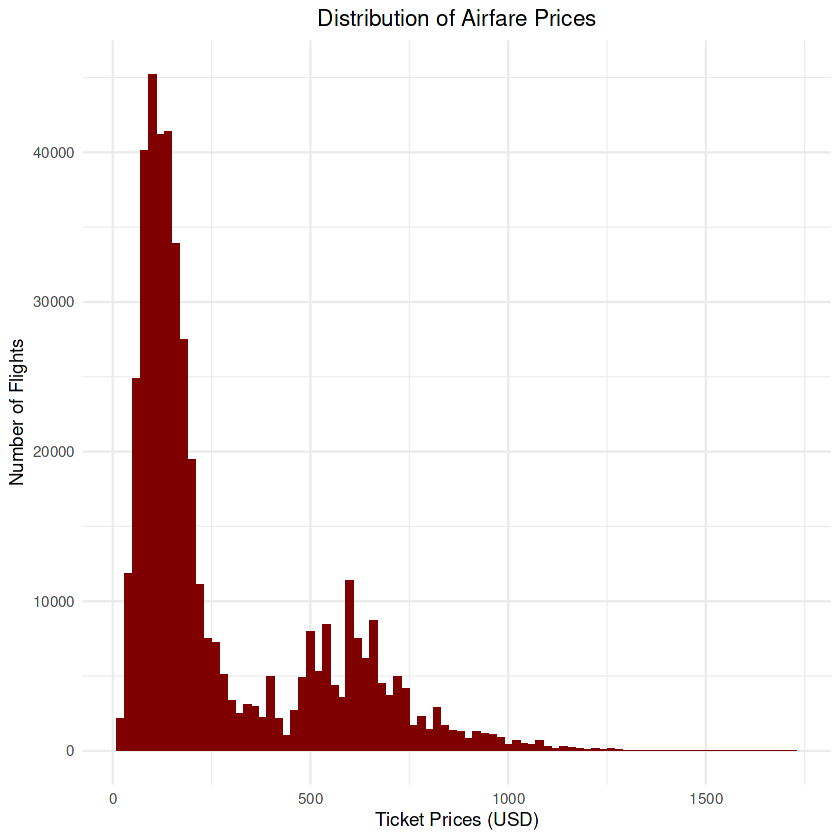

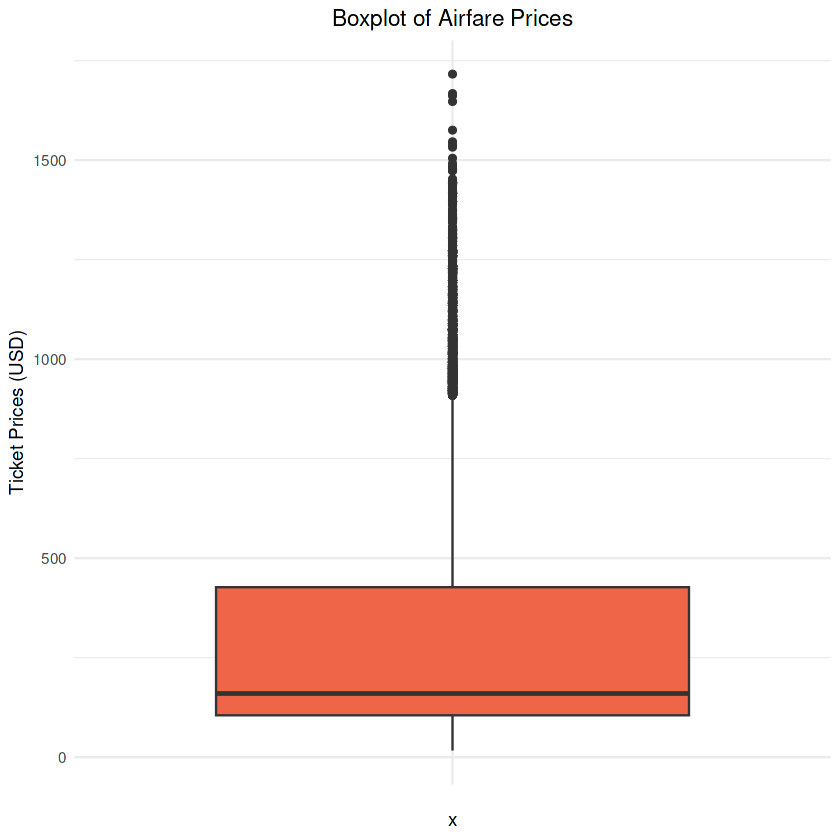

In [4]:
ggplot(data = flights, aes(x = `Fare (USD)`)) +
  geom_histogram(fill = c1, binwidth = 20) +  
  xlab("Ticket Prices (USD)") +
  ylab("Number of Flights") +
  ggtitle("Distribution of Airfare Prices") +
  theme(plot.title = element_text(hjust = 0.5))

ggplot(data = flights, aes(x = "", y = `Fare (USD)`)) +
  geom_boxplot(fill = c3) +  
  ylab("Ticket Prices (USD)") +
  ggtitle("Boxplot of Airfare Prices") +
  theme(plot.title = element_text(hjust = 0.5))


## Metrics on Flight Durations

In the next stage of the analysis, the focus was on examining the duration of flights.

The following plots indicate that a significant portion of flights last over 5 hours (with an average duration of 12 hours), and most flights are flights with one stop.

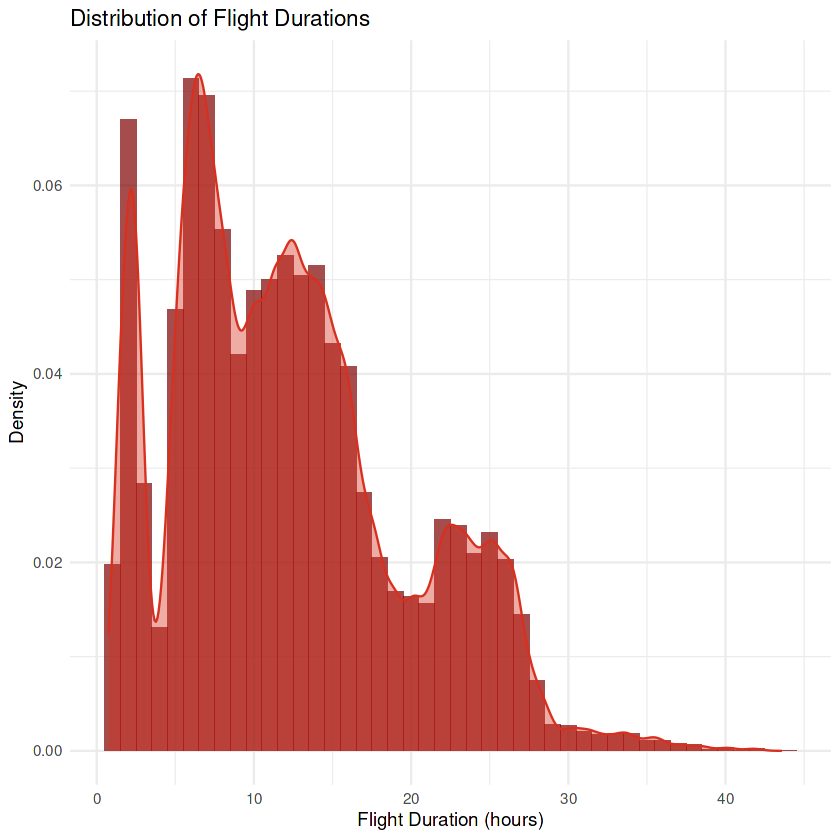

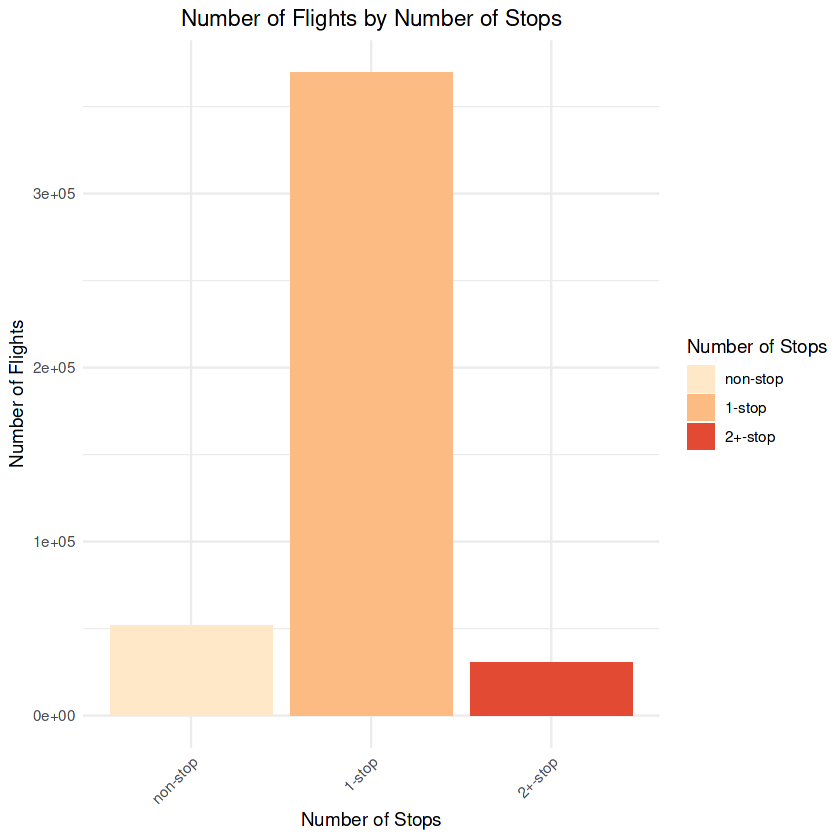

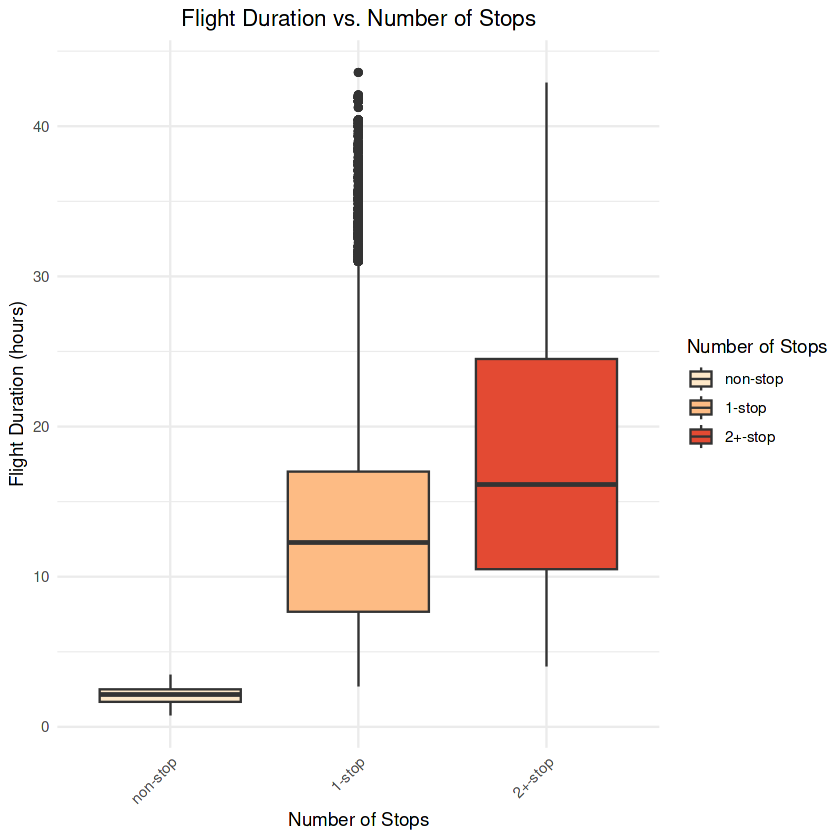

In [5]:
ggplot(data = flights, aes(x = Duration_in_hours)) +
  geom_histogram(aes(y = after_stat(density)), fill = c1, binwidth = 1, alpha = 0.7) +
  geom_density(color = c2, fill = c2, alpha = 0.4) +
  xlab("Flight Duration (hours)") +
  ylab("Density") +
  ggtitle("Distribution of Flight Durations") +
  guides(fill = "none")

ggplot(flights, aes(x = Total_stops, fill = Total_stops)) +
  geom_bar() +
  xlab("Number of Stops") +
  ylab("Number of Flights") +
  ggtitle("Number of Flights by Number of Stops") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
        plot.title = element_text(hjust = 0.5)) +
  scale_fill_brewer(palette = "OrRd") +
  labs(fill = "Number of Stops")

ggplot(flights, aes(x = Total_stops, y = Duration_in_hours, fill = Total_stops)) +
  geom_boxplot() +
  xlab("Number of Stops") +
  ylab("Flight Duration (hours)") +
  ggtitle("Flight Duration vs. Number of Stops") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
        plot.title = element_text(hjust = 0.5)) +
  scale_fill_brewer(palette = "OrRd") +
  labs(fill = "Number of Stops")

## Exploration of Hourly and Daily Patterns

### Frequency of Flights by Day of the Week

Next, the frequency of flights on each day of the week was analyzed. Their number is similar on each day, with slightly higher numbers on Mondays.

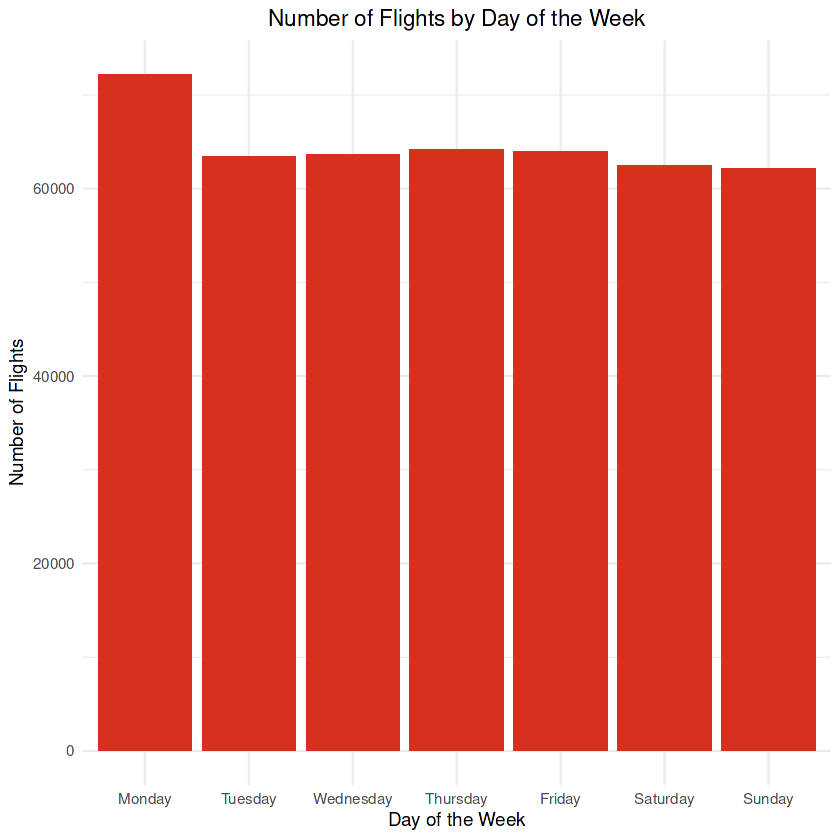

In [6]:
ggplot(data = flights, aes(x = Journey_day)) +
  geom_bar(fill = c2) +  
  xlab("Day of the Week") +
  ylab("Number of Flights") +
  ggtitle("Number of Flights by Day of the Week") +
  theme(plot.title = element_text(hjust = 0.5))

Next, bar charts were used to examine patterns in departure and arrival times throughout the day.

Both departures and arrivals before 6:00 were the least frequent. Morning hours dominate departures, while evening hours dominate arrivals.

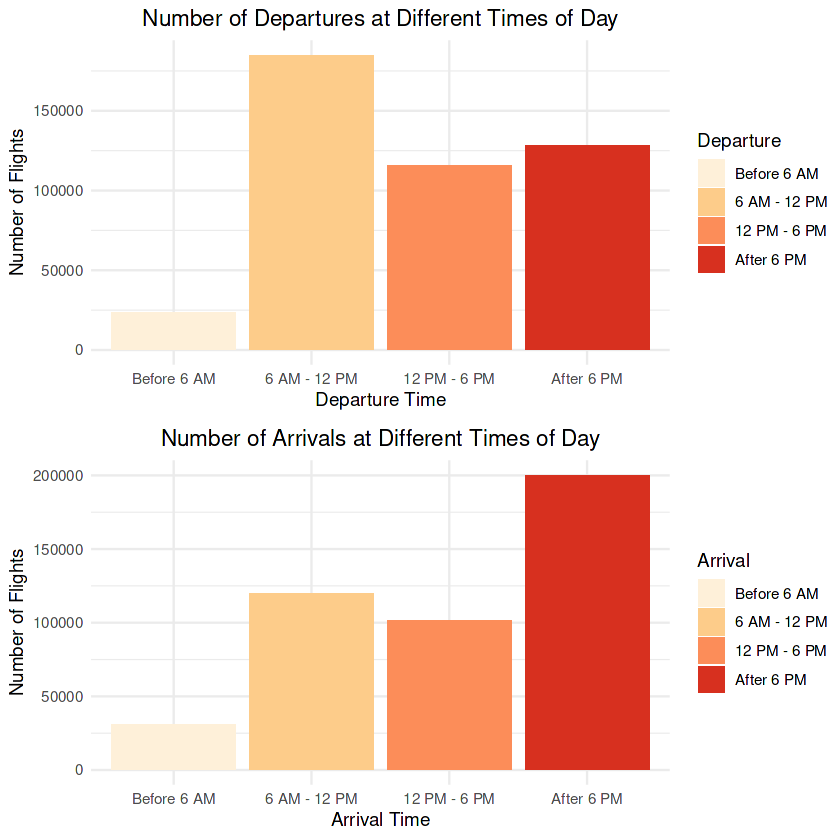

In [7]:
dep <- ggplot(data = flights, aes(x = Departure, fill = Departure)) +
  geom_bar() +  
  xlab("Departure Time") +
  ylab("Number of Flights") +
  ggtitle("Number of Departures at Different Times of Day") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  scale_fill_brewer(palette = "OrRd")

arr <- ggplot(data = flights, aes(x = Arrival, fill = Arrival)) +
  geom_bar() +  
  xlab("Arrival Time") +
  ylab("Number of Flights") +
  ggtitle("Number of Arrivals at Different Times of Day") +
  theme(plot.title = element_text(hjust = 0.5)) +  
  scale_fill_brewer(palette = "OrRd")

grid.arrange(dep, arr, nrow = 2)

## Comparison of Airlines and Ticket Classes

In this step, airlines and ticket classes were compared.

The most popular carrier turned out to be Vistara, followed by Air India and Indigo, occupying the majority of the dataset.

Over half of the tickets were sold in the economy class, while the first class was almost non-existent. Ticket classes were most diverse among tickets sold by Vistara.

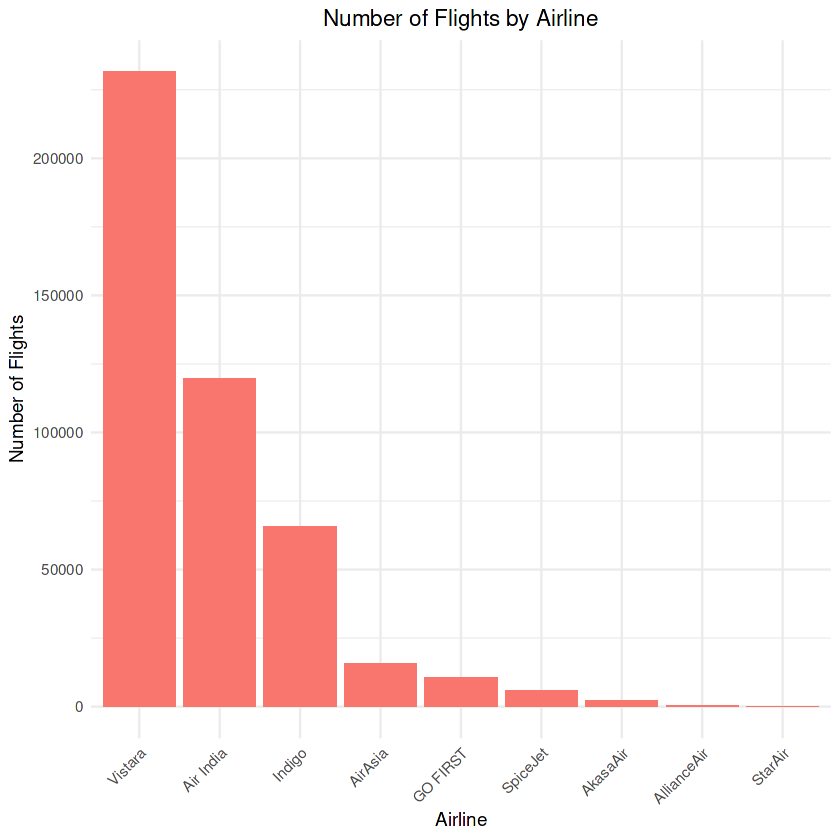

In [8]:
ggplot(flights) +
  geom_bar(aes(x = forcats::fct_infreq(Airline), fill = c1)) + 
  xlab("Airline") +
  ylab("Number of Flights") +
  ggtitle("Number of Flights by Airline") +
  theme(plot.title = element_text(hjust = 0.5),
  axis.text.x = element_text(angle = 45, hjust = 1)) +
  guides(fill = "none")

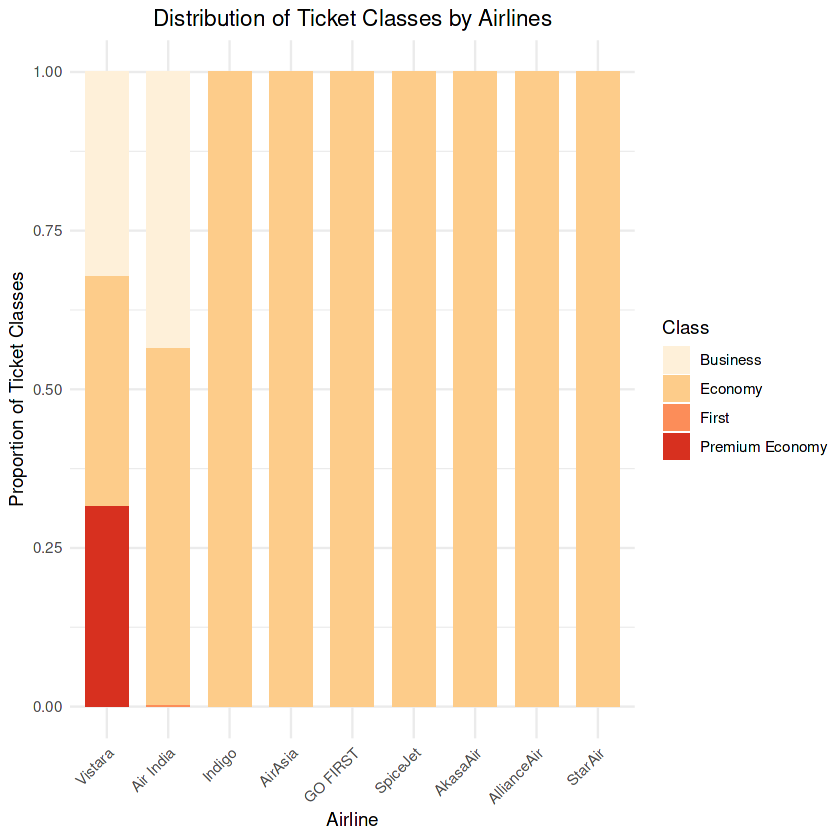

In [9]:
ggplot(flights, aes(x = forcats::fct_infreq(Airline), fill = Class)) +
  geom_bar(position = "fill", width = 0.7) +
  xlab("Airline") +
  ylab("Proportion of Ticket Classes") +
  ggtitle("Distribution of Ticket Classes by Airlines") +
  theme(plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "OrRd")


## Exploring Flight Combinations

This step checks flight combinations based on their source and destination, to look for most popular routes.

From the resulting plot, it can be observed that flights between Delhi and other major cities like Mumbai and Bangalore are among the most popular routes. This aligns with expectations, considering Delhi's status as a major transportation hub within India.

`summarise()` has grouped output by 'Source'. You can override using the
`.groups` argument.


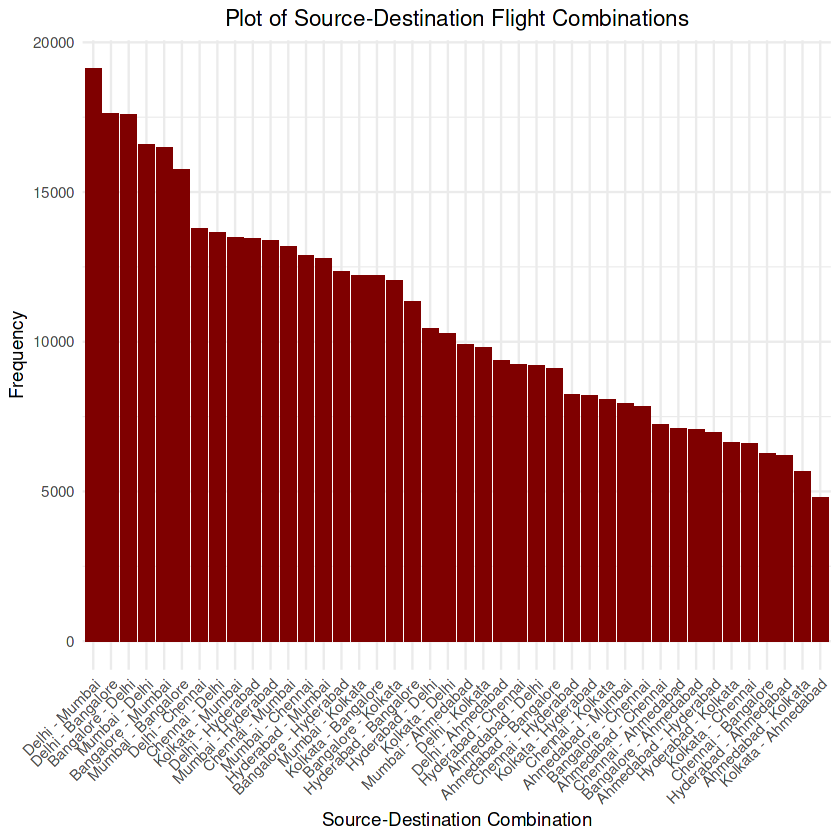

In [10]:
combo_counts <- flights %>%
  group_by(Source, Destination) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))

ggplot(combo_counts, aes(x = reorder(paste(Source, "-", Destination), -Count), y = Count)) +
  geom_bar(stat = "identity", fill = c1) +
  xlab("Source-Destination Combination") +
  ylab("Frequency") +
  ggtitle("Plot of Source-Destination Flight Combinations") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5))

## Analysis of Ticket Price Distribution by Various Categories

The first stage of price analysis focuses on examining the distribution of ticket prices by airline, allowing for price comparison between different carriers.

Vistara, although mainly offering cheaper tickets, also has more expensive ones, which corresponds to the distribution of ticket classes. Higher prices can also be observed in the offerings of Air India.

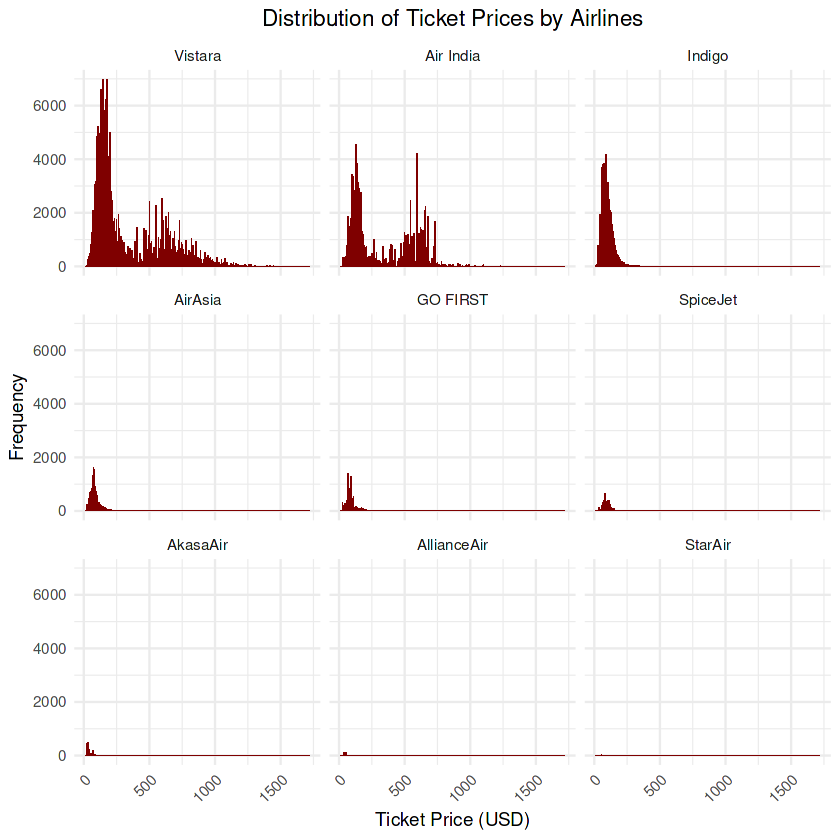

In [11]:
airline_freq <- flights %>%
  group_by(Airline) %>%
  summarise(Frequency = n()) %>%
  arrange(desc(Frequency))

flights$Airline <- factor(flights$Airline, levels = airline_freq$Airline)

ggplot(flights, aes(x = `Fare (USD)`)) +
  geom_histogram(binwidth = 5, fill = c1) +  
  facet_wrap(~ Airline) +
  xlab("Ticket Price (USD)") +
  ylab("Frequency") +
  ggtitle("Distribution of Ticket Prices by Airlines") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5))

The analysis was expanded to include the distribution of ticket prices by flight class, providing insight into price differences between classes.Ticket price distributions were also examined based on the day of the week, which largely overlapped.


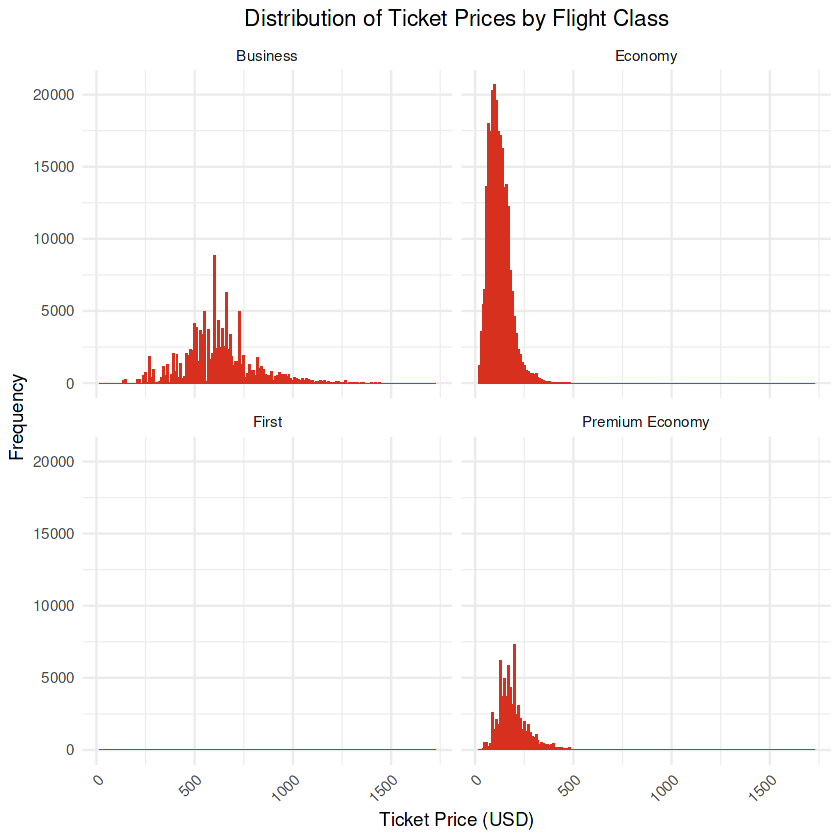

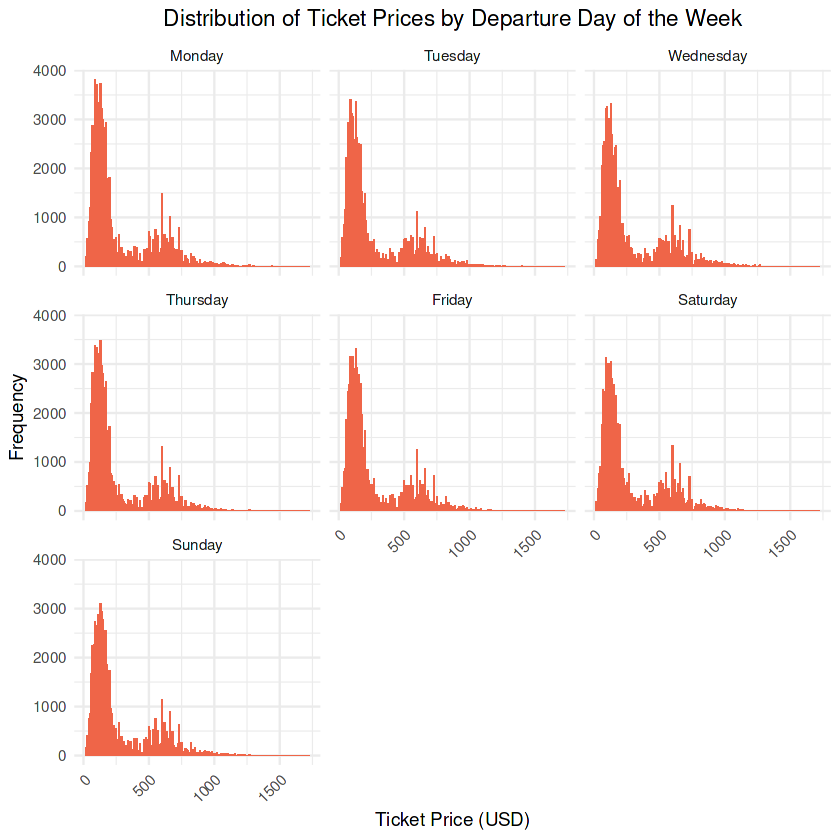

In [12]:
ggplot(flights, aes(x = `Fare (USD)`)) +
  geom_histogram(binwidth = 10, fill = c2) +  
  facet_wrap(~ Class) +
  xlab("Ticket Price (USD)") +
  ylab("Frequency") +
  ggtitle("Distribution of Ticket Prices by Flight Class") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5))

ggplot(flights, aes(x = `Fare (USD)`)) +
  geom_histogram(binwidth = 10, fill = c3) +  
  facet_wrap(~ Journey_day) +
  xlab("Ticket Price (USD)") +
  ylab("Frequency") +
  ggtitle("Distribution of Ticket Prices by Departure Day of the Week") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5))

## Dynamics of Ticket Prices Depending on Time Until Departure

Another part of the analysis focuses on the relationship between the average ticket price and the number of days remaining until departure on the day of purchase.

A linear relationship can be observed here. Prices increase as the departure day approaches, which may be an important suggestion for people planning to purchase a ticket.

`geom_smooth()` using formula = 'y ~ x'


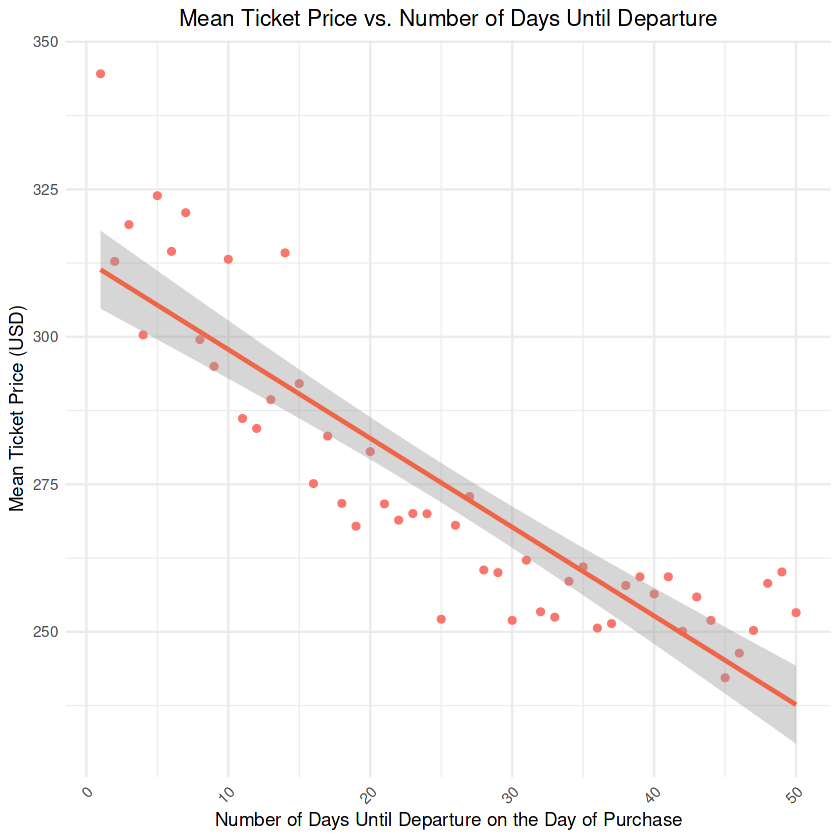

In [13]:
flights_sum <- flights %>%
  group_by(Days_left) %>%
  summarise(Mean_Fare = mean(`Fare (USD)`, na.rm = TRUE))

ggplot(flights_sum, aes(x = Days_left, y = Mean_Fare, color = c1)) +
  geom_point() +
  geom_smooth(method = "lm", color = c3) +
  xlab("Number of Days Until Departure on the Day of Purchase") +
  ylab("Mean Ticket Price (USD)") +
  ggtitle("Mean Ticket Price vs. Number of Days Until Departure") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
        plot.title = element_text(hjust = 0.5)) +
  guides(color = "none")

## Summary

The analysis conducted on the dataset concerning airline ticket prices in India revealed several interesting trends.

It was found that the ticket price changes depending on the number of days remaining until the departure date – the closer the date, the higher the price. This suggests that early trip planning can result in significant cost savings.

The analysis confirmed slight differences in prices between different airlines, suggesting that other factors, such as flight duration, may have a greater impact on ticket prices.

The most popular carrier turned out to be Vistara, which aligns with the diversity of ticket classes offered by this company. The most common departure and destination locations were understandable and correlated with the largest cities in India.